In [1]:
# import all possible packages useful for multiple linear regression
import pandas as pd
import numpy as np
import sklearn
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
from statsmodels.formula.api import logit
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import data set from hard drive
med = pd.read_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D208\medical_clean.csv", skiprows=0, delimiter=",")

In [3]:
#examine the list of variables, their data type and the shape of the data
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
#print the header 
med.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [5]:
#change the values of the ordinal categorical variable to numeric ranks
med['Complication_risk'].unique()
med['Complication_risk'] = med['Complication_risk'].map({'Low':0,'Medium':1,'High':2})

In [6]:
#change all binary categorical values to 0,1
med['ReAdmis'] = med['ReAdmis'].map({'No':0, "Yes":1})
med['Soft_drink'] = med['Soft_drink'].map({'No':0, "Yes":1})
med['HighBlood'] = med['HighBlood'].map({'No':0, "Yes":1})
med['Stroke'] = med['Stroke'].map({'No':0, "Yes":1})
med['Overweight'] = med['Overweight'].map({'No':0, "Yes":1})
med['Arthritis'] = med['Arthritis'].map({'No':0, "Yes":1})
med['Diabetes'] = med['Diabetes'].map({'No':0, "Yes":1})
med['Hyperlipidemia'] = med['Hyperlipidemia'].map({'No':0, "Yes":1})
med['BackPain'] = med['BackPain'].map({'No':0, "Yes":1})
med['Anxiety'] = med['Anxiety'].map({'No':0, "Yes":1})
med['Allergic_rhinitis'] = med['Allergic_rhinitis'].map({'No':0, "Yes":1})
med['Reflux_esophagitis'] = med['Reflux_esophagitis'].map({'No':0, "Yes":1})
med['Asthma'] = med['Asthma'].map({'No':0, "Yes":1})

In [7]:
#Create dummy columns for the Services column
med = pd.get_dummies(med, prefix='Services', prefix_sep='_', dummy_na=False, columns=["Services"])

In [8]:
#Check whether dummy columns were created
med.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Initial_days', 'TotalCharge',
       'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8', 'Services_Blood Work', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI'],
      dtype='object')

In [9]:
#Gross selection of data before PCA
med_df = med[['Doc_visits',"Initial_days", "ReAdmis","VitD_levels", "Soft_drink","HighBlood", "Stroke", "Complication_risk", "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma",'Services_Blood Work', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI']]

In [12]:
med_df.describe()

,Doc_visits,Initial_days,ReAdmis,VitD_levels,Soft_drink,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.012200,34.455299,0.366900,17.964262,0.257500,0.409000,0.199300,1.123300,0.709400,0.357400,...,0.337200,0.411400,0.321500,0.394100,0.413500,0.28930,0.526500,0.122500,0.313000,0.038000
std,1.045734,26.309341,0.481983,2.017231,0.437279,0.491674,0.399494,0.730172,0.454062,0.479258,...,0.472777,0.492112,0.467076,0.488681,0.492486,0.45346,0.499322,0.327879,0.463738,0.191206
min,1.000000,1.001981,0.000000,9.806483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,7.896215,0.000000,16.626439,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,35.836244,0.000000,17.951122,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000
75%,6.000000,61.161020,1.000000,19.347963,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,1.000000,0.000000
max,9.000000,71.981490,1.000000,26.394449,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [10]:
#Standardize the data so that all the variables are uniform in comparison
x = med_df[["Initial_days","VitD_levels", "Soft_drink", "HighBlood", "Stroke", "Complication_risk", "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma",'Services_Blood Work', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI']]
y = med_df["ReAdmis"]
x_data=x
target=y
scaled_data=preprocessing.scale(x_data)

<AxesSubplot:xlabel='ReAdmis', ylabel='Count'>

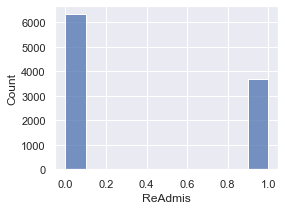

In [11]:
#Create histograms of every column to visualize 
sns.set(rc = {'figure.figsize':(4,3)})
sns.histplot(data=med_df, x="ReAdmis", bins=10)

<AxesSubplot:xlabel='Initial_days', ylabel='Count'>

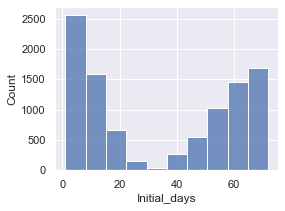

In [12]:
sns.histplot(data=med_df, x="Initial_days", bins=10)

<AxesSubplot:xlabel='VitD_levels', ylabel='Count'>

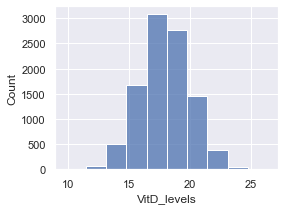

In [13]:
sns.histplot(data=med_df, x="VitD_levels", bins=10)

<AxesSubplot:xlabel='Soft_drink', ylabel='Count'>

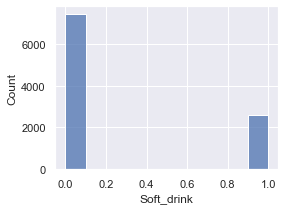

In [14]:
sns.histplot(data=med_df, x="Soft_drink", bins=10)

<AxesSubplot:xlabel='HighBlood', ylabel='Count'>

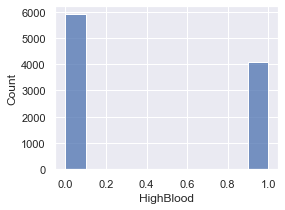

In [15]:
sns.histplot(data=med_df, x="HighBlood", bins=10)

<AxesSubplot:xlabel='Stroke', ylabel='Count'>

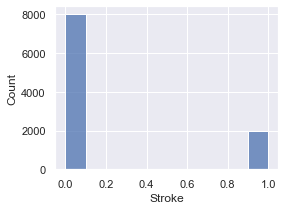

In [16]:
sns.histplot(data=med_df, x="Stroke", bins=10)

<AxesSubplot:xlabel='Complication_risk', ylabel='Count'>

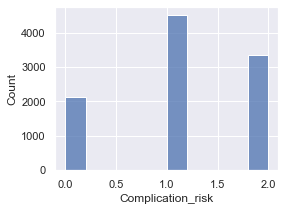

In [17]:
sns.histplot(data=med_df, x="Complication_risk", bins=10)

<AxesSubplot:xlabel='Overweight', ylabel='Count'>

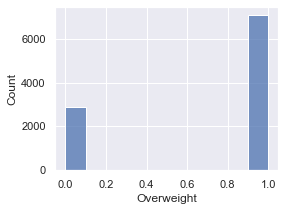

In [18]:
sns.histplot(data=med_df, x="Overweight", bins=10)

<AxesSubplot:xlabel='Arthritis', ylabel='Count'>

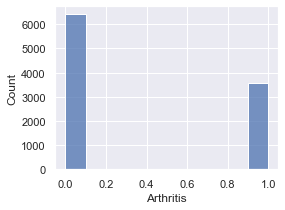

In [19]:
sns.histplot(data=med_df, x="Arthritis", bins=10)

<AxesSubplot:xlabel='Diabetes', ylabel='Count'>

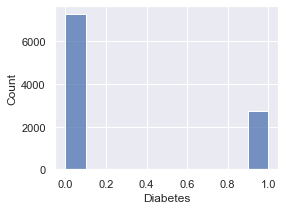

In [20]:
sns.histplot(data=med_df, x="Diabetes", bins=10)

<AxesSubplot:xlabel='Hyperlipidemia', ylabel='Count'>

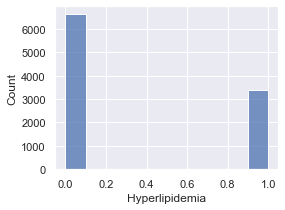

In [21]:
sns.histplot(data=med_df, x="Hyperlipidemia", bins=10)

<AxesSubplot:xlabel='BackPain', ylabel='Count'>

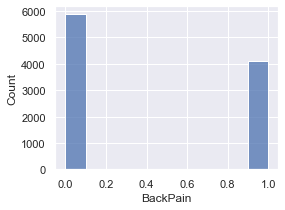

In [22]:
sns.histplot(data=med_df, x="BackPain", bins=10)

<AxesSubplot:xlabel='Anxiety', ylabel='Count'>

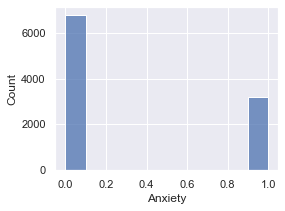

In [23]:
sns.histplot(data=med_df, x="Anxiety", bins=10)

<AxesSubplot:xlabel='Allergic_rhinitis', ylabel='Count'>

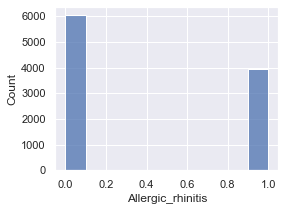

In [24]:
sns.histplot(data=med_df, x="Allergic_rhinitis", bins=10)

<AxesSubplot:xlabel='Reflux_esophagitis', ylabel='Count'>

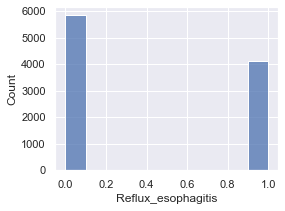

In [25]:
sns.histplot(data=med_df, x="Reflux_esophagitis", bins=10)

<AxesSubplot:xlabel='Asthma', ylabel='Count'>

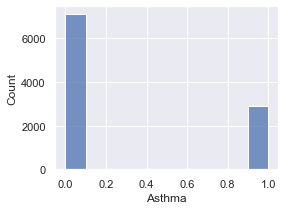

In [26]:
sns.histplot(data=med_df, x="Asthma", bins=10)

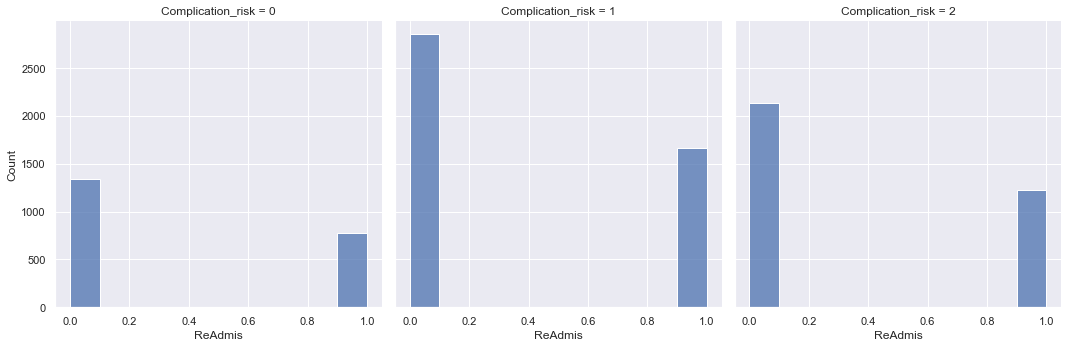

In [27]:
#Create bivariate visualizations of data against "ReAdmis"
sns.displot(data=med_df, x="ReAdmis", col="Complication_risk", col_wrap=3, bins=10)
plt.show()

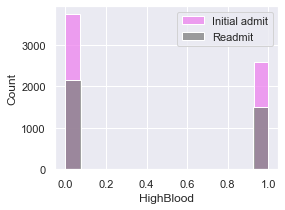

In [28]:
readmits = med_df[med_df['ReAdmis']==1]
admits = med_df[med_df['ReAdmis']==0]
sns.histplot(data=admits, x="HighBlood", color='violet')
sns.histplot(data=readmits, x="HighBlood", color='grey')
plt.legend(labels=["Initial admit", "Readmit"], bbox_to_anchor=(1,1))

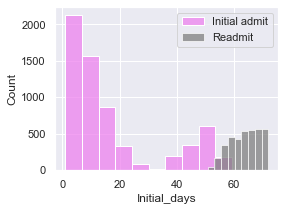

In [29]:
sns.histplot(data=admits, x="Initial_days", bins=10,color='violet')
sns.histplot(data=readmits, x="Initial_days",bins=10, color='grey')
plt.legend(labels=["Initial admit", "Readmit"], bbox_to_anchor=(1,1))

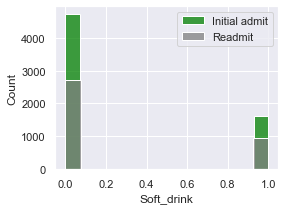

In [30]:
sns.histplot(data=admits, x="Soft_drink", color='green')
sns.histplot(data=readmits, x="Soft_drink", color='grey')
plt.legend(labels=["Initial admit", "Readmit"], bbox_to_anchor=(1,1))

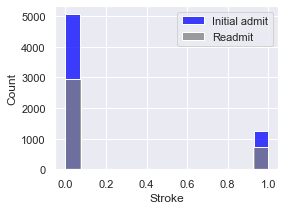

In [31]:
sns.histplot(data=admits, x="Stroke", color='blue')
sns.histplot(data=readmits, x="Stroke", color='grey')
plt.legend(labels=["Initial admit", "Readmit"], bbox_to_anchor=(1,1))

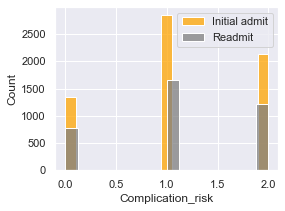

In [32]:
sns.histplot(data=admits, x="Complication_risk", color='orange')
sns.histplot(data=readmits, x="Complication_risk", color='grey')
plt.legend(labels=["Initial admit", "Readmit"], bbox_to_anchor=(1,1))

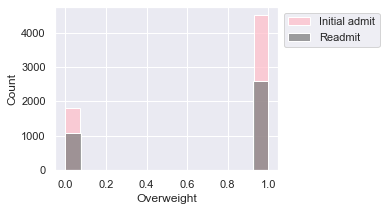

In [33]:
sns.histplot(data=admits, x="Overweight", color='pink')
sns.histplot(data=readmits, x="Overweight", color='grey')
plt.legend(labels=["Initial admit", "Readmit"], bbox_to_anchor=(1,1))

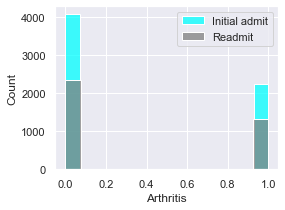

In [34]:
sns.histplot(data=admits, x="Arthritis", color='aqua')
sns.histplot(data=readmits, x="Arthritis", color='grey')
plt.legend(labels=["Initial admit", "Readmit"], bbox_to_anchor=(1,1))

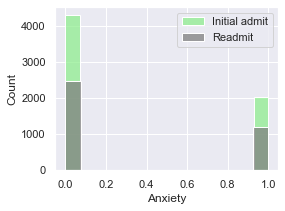

In [35]:
sns.histplot(data=admits, x="Anxiety", color='lightgreen')
sns.histplot(data=readmits, x="Anxiety", color='grey')
plt.legend(labels=["Initial admit", "Readmit"], bbox_to_anchor=(1,1))

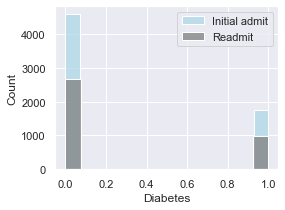

In [36]:
sns.histplot(data=admits, x="Diabetes", color='lightblue')
sns.histplot(data=readmits, x="Diabetes", color='grey')
plt.legend(labels=["Initial admit", "Readmit"], bbox_to_anchor=(1,1))

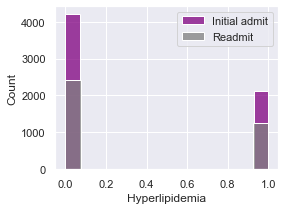

In [37]:
sns.histplot(data=admits, x="Hyperlipidemia", color='purple')
sns.histplot(data=readmits, x="Hyperlipidemia", color='grey')
plt.legend(labels=["Initial admit", "Readmit"], bbox_to_anchor=(1,1))

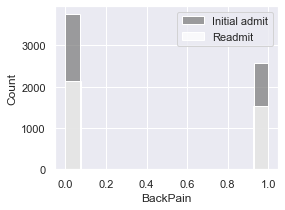

In [38]:
sns.histplot(data=admits, x="BackPain", color='grey')
sns.histplot(data=readmits, x="BackPain", color='white')
plt.legend(labels=["Initial admit", "Readmit"], bbox_to_anchor=(1,1))

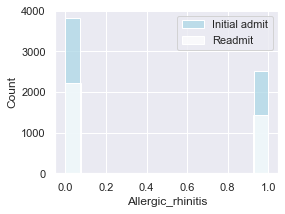

In [39]:
sns.histplot(data=admits, x="Allergic_rhinitis", color='lightblue')
sns.histplot(data=readmits, x="Allergic_rhinitis", color='white')
plt.legend(labels=["Initial admit", "Readmit"], bbox_to_anchor=(1,1))

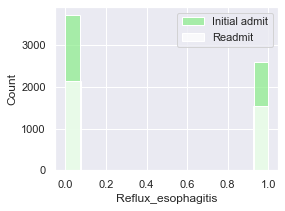

In [40]:
sns.histplot(data=admits, x="Reflux_esophagitis", color='lightgreen')
sns.histplot(data=readmits, x="Reflux_esophagitis", color='white')
plt.legend(labels=["Initial admit", "Readmit"], bbox_to_anchor=(1,1))

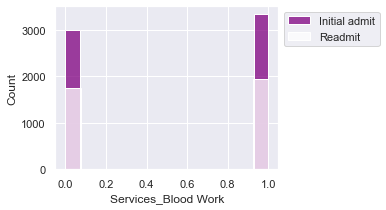

In [41]:
sns.histplot(data=admits, x="Services_Blood Work", color='purple')
sns.histplot(data=readmits, x="Services_Blood Work", color='white')
plt.legend(labels=["Initial admit", "Readmit"], bbox_to_anchor=(1,1))

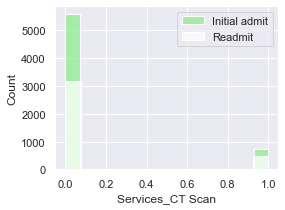

In [42]:
sns.histplot(data=admits, x="Services_CT Scan", color='lightgreen')
sns.histplot(data=readmits, x="Services_CT Scan", color='white')
plt.legend(labels=["Initial admit", "Readmit"], bbox_to_anchor=(1,1))

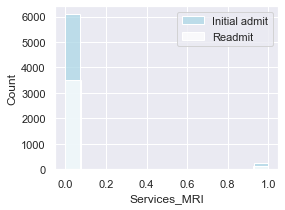

In [43]:
sns.histplot(data=admits, x="Services_MRI", color='lightblue')
sns.histplot(data=readmits, x="Services_MRI", color='white')
plt.legend(labels=["Initial admit", "Readmit"], bbox_to_anchor=(1,1))

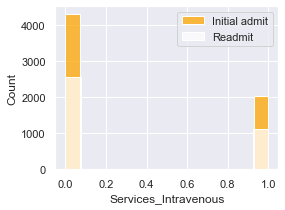

In [44]:
sns.histplot(data=admits, x="Services_Intravenous", color='orange')
sns.histplot(data=readmits, x="Services_Intravenous", color='white')
plt.legend(labels=["Initial admit", "Readmit"], bbox_to_anchor=(1,1))

In [46]:
#Separate data into 30% test data and 70% training data
X= med_df[['Initial_days','VitD_levels','Soft_drink','HighBlood','Stroke','Complication_risk','Overweight','Arthritis','Diabetes','Hyperlipidemia','BackPain','Anxiety', 'Allergic_rhinitis','Reflux_esophagitis','Asthma','Services_Blood Work', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI']]
y= med_df[['ReAdmis']]
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=944)

In [47]:
#Verify train and test sets have the same percentage of ReAdmis
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
print(round(sum(train['ReAdmis'])/len(train), 2))
print(round(sum(test['ReAdmis'])/len(test), 2))

0.37
0.35


In [48]:
#check statistics of training data
train.describe()

,Initial_days,VitD_levels,Soft_drink,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI,ReAdmis
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,34.731999,17.992967,0.254429,0.411286,0.197429,1.128857,0.709143,0.360429,0.272429,0.335857,0.410571,0.327000,0.390286,0.412429,0.286571,0.530286,0.122429,0.309857,0.037429,0.372429
std,26.316482,2.010588,0.435571,0.492102,0.398087,0.730978,0.454190,0.480159,0.445241,0.472323,0.491973,0.469151,0.487849,0.492307,0.452192,0.499118,0.327804,0.462468,0.189823,0.483486
min,1.001981,10.315234,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.118691,16.669116,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.605210,17.977789,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.283375,19.363805,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,71.981490,25.444099,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
#check statistics of test data
test.describe()

,Initial_days,VitD_levels,Soft_drink,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI,ReAdmis
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,33.809665,17.897283,0.264667,0.403667,0.203667,1.110333,0.710000,0.350333,0.277000,0.340333,0.413333,0.308667,0.403000,0.416000,0.295667,0.517667,0.122667,0.320333,0.039333,0.354000
std,26.285728,2.031407,0.441229,0.490714,0.402791,0.728242,0.453838,0.477154,0.447591,0.473900,0.492514,0.462020,0.490583,0.492976,0.456418,0.499771,0.328109,0.466682,0.194419,0.478289
min,1.009143,9.806483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.534621,16.555168,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.475938,17.864851,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,60.612885,19.281052,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,71.958130,26.394449,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
# VIF for demographic data. Adding gender columns returned an error when mixed with marital
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = med_df[["Initial_days","VitD_levels","Soft_drink", "HighBlood","Stroke","Complication_risk","Overweight","Arthritis","Diabetes", "Hyperlipidemia","BackPain", "Anxiety","Allergic_rhinitis","Reflux_esophagitis","Asthma",'Services_Blood Work', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI']]
vif_demo_data = pd.DataFrame()
vif_demo_data['Med_cond'] = X.columns
vif_demo_data["VIF"] = [variance_inflation_factor(X.values, i)
    for i in range(len(X.columns))]
print(vif_demo_data)

                Med_cond        VIF
0           Initial_days   1.001819
1            VitD_levels   1.001634
2             Soft_drink   1.001825
3              HighBlood   1.001891
4                 Stroke   1.001443
5      Complication_risk   1.001665
6             Overweight   1.001643
7              Arthritis   1.002060
8               Diabetes   1.002595
9         Hyperlipidemia   1.001333
10              BackPain   1.002536
11               Anxiety   1.001602
12     Allergic_rhinitis   1.000798
13    Reflux_esophagitis   1.001818
14                Asthma   1.001697
15   Services_Blood Work  49.374997
16      Services_CT Scan  12.369497
17  Services_Intravenous  29.673159
18          Services_MRI   4.447727


In [51]:
#Perform PCA
from sklearn.decomposition import PCA

med_pca = X
med_normalized = (med_pca-med_pca.mean())/med_pca.std()
pca = PCA(n_components = med_pca.shape[1])
pca.fit(med_normalized)
loadings = pd.DataFrame(pca.components_.T, 
columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4','PCA5','PCA6', 'PCA7', 'PCA8','PCA9','PCA10','PCA11','PCA12','PCA13', "PCA14", "PCA15", "PCA16","PCA17","PCA18", "PCA19"],
index=med_normalized.columns)
loadings

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19
Initial_days,-0.017985,0.059998,0.190449,-0.484233,0.011653,-0.116738,0.197698,0.065804,0.064636,0.058644,0.004302,-0.445776,-0.141178,-0.347005,0.538685,0.015790,-0.070713,-0.161308,-5.707429e-18
VitD_levels,-0.002942,0.006534,-0.327753,0.026308,0.141457,-0.048904,0.127932,0.493260,0.205274,-0.315299,0.111533,-0.045310,0.484350,-0.073560,0.160614,-0.077145,0.409355,0.119963,7.137681e-17
Soft_drink,0.007390,-0.009177,0.226941,0.175102,0.156721,-0.463735,-0.135425,0.272906,-0.223026,0.009121,0.152330,-0.254704,0.230849,-0.232164,-0.399944,-0.154084,-0.281922,-0.277485,1.072307e-16
HighBlood,-0.003988,0.070798,-0.267893,0.022432,0.326034,0.227709,0.026110,-0.044950,-0.476097,0.190932,0.117249,-0.249076,0.020234,0.402055,0.207086,-0.443082,-0.003570,-0.147188,-3.295403e-16
Stroke,-0.025506,0.084975,-0.111507,0.266913,0.018618,-0.059811,0.221381,-0.080262,0.376169,0.442139,0.334765,-0.380083,0.137693,0.244713,-0.020484,0.358998,-0.161457,0.146102,7.387126e-17
Complication_risk,0.008438,0.040707,-0.270287,0.213825,-0.191433,0.092901,-0.013639,0.240272,-0.479978,0.367665,-0.103923,0.025125,-0.036947,-0.473952,0.103066,0.194748,-0.032051,0.351770,1.248816e-16
Overweight,0.007498,0.008775,-0.240068,0.127084,0.369852,0.133084,0.042090,-0.296041,-0.176597,-0.432568,0.187167,-0.210433,-0.231759,-0.255730,-0.140818,0.445369,0.130651,-0.173760,4.243426e-17
Arthritis,-0.003261,-0.002654,0.047991,-0.511366,0.036007,0.274259,-0.274587,0.061148,-0.068702,-0.141012,0.420315,-0.078510,0.104527,0.013312,-0.222219,0.010596,-0.269272,0.489893,3.661674e-17
Diabetes,0.025153,0.072674,0.319300,0.162686,0.038814,0.063375,-0.548887,-0.117205,0.096950,0.230887,0.197024,-0.186198,-0.071825,-0.140606,0.055513,-0.112721,0.603080,0.067168,5.261227e-17
Hyperlipidemia,-0.006332,-0.005175,0.195705,0.168084,-0.324954,-0.174613,-0.223756,-0.099645,-0.322602,-0.372784,-0.141139,-0.263235,0.262101,0.349024,0.328616,0.290179,-0.051456,0.140328,2.452451e-17


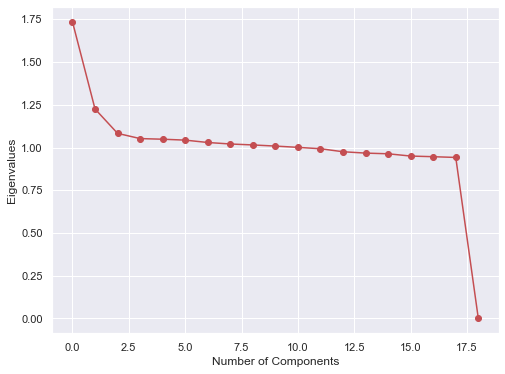

In [52]:
#Create a covariance matrix to decide which PCAs to keep
sns.set(rc = {'figure.figsize':(8,6)})
cov_matrix = np.dot(med_normalized.T, med_normalized)/med_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]
plt.plot(eigenvalues, 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.show()

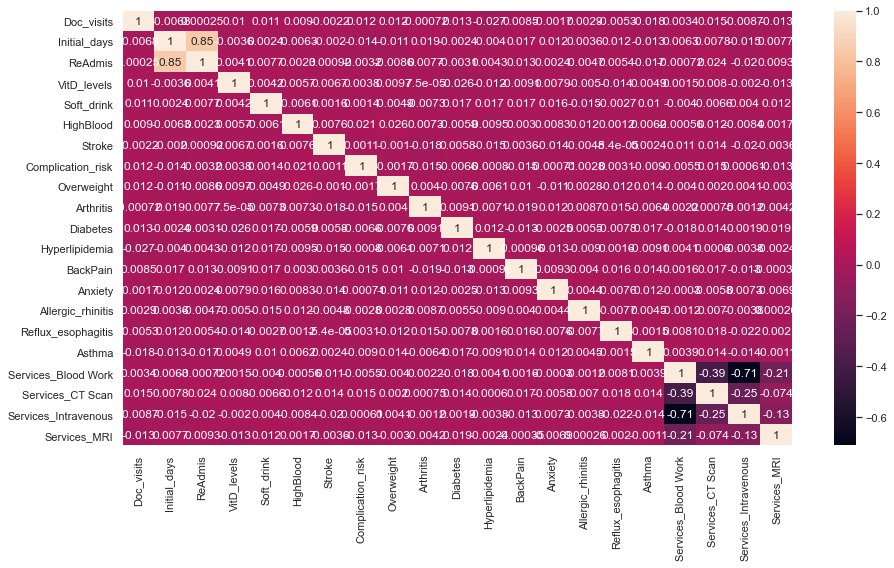

In [53]:
#heatmap to view correlation
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(med_df.corr(), annot=True)
plt.show()

In [54]:
#Check Pearson correlation
med_df.corr(method='pearson')

,Doc_visits,Initial_days,ReAdmis,VitD_levels,Soft_drink,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI
Doc_visits,1.000000,-0.006754,0.000246,0.010210,0.011282,0.008967,-0.002230,0.012306,0.011890,-0.000719,...,-0.026730,0.008514,-0.001684,0.002920,-0.005330,-0.017989,0.003403,0.014600,-0.008700,-0.012822
Initial_days,-0.006754,1.000000,0.850862,-0.003642,0.002432,-0.006333,-0.002043,-0.014294,-0.011077,0.018907,...,-0.003974,0.017344,0.011908,0.003635,0.012237,-0.013496,0.006272,0.007786,-0.015430,0.007692
ReAdmis,0.000246,0.850862,1.000000,0.004083,0.007703,0.002270,0.000918,-0.003236,-0.008586,0.007663,...,0.004307,0.013313,0.002406,-0.004651,0.005422,-0.017133,-0.000718,0.024395,-0.020313,0.009309
VitD_levels,0.010210,-0.003642,0.004083,1.000000,0.004172,0.005660,0.006721,0.003787,0.009689,0.000075,...,-0.011870,-0.009080,0.007875,-0.005035,-0.014419,0.004937,0.001475,0.008048,-0.001984,-0.012840
Soft_drink,0.011282,0.002432,0.007703,0.004172,1.000000,-0.006129,0.001604,0.001410,-0.004888,-0.007304,...,0.016791,0.017496,0.016226,-0.015354,-0.002676,0.010114,-0.004002,-0.006583,0.003958,0.012141
HighBlood,0.008967,-0.006333,0.002270,0.005660,-0.006129,1.000000,0.007568,0.021368,0.026231,0.007314,...,-0.009529,0.003048,0.008303,0.011709,0.001150,0.006174,-0.000564,0.011772,-0.008408,0.001681
Stroke,-0.002230,-0.002043,0.000918,0.006721,0.001604,0.007568,1.000000,0.001119,-0.001011,-0.018438,...,-0.014847,0.003602,-0.013801,-0.004837,-0.000054,0.002443,0.010872,0.013635,-0.019871,-0.003580
Complication_risk,0.012306,-0.014294,-0.003236,0.003787,0.001410,0.021368,0.001119,1.000000,-0.001716,-0.015054,...,-0.000802,-0.015379,-0.000707,-0.002782,0.003102,-0.008973,-0.005534,0.015021,0.000612,-0.012789
Overweight,0.011890,-0.011077,-0.008586,0.009689,-0.004888,0.026231,-0.001011,-0.001716,1.000000,0.003954,...,-0.006102,0.010083,-0.011186,0.002819,-0.012240,0.013943,-0.003966,0.002005,0.004074,-0.002963
Arthritis,-0.000719,0.018907,0.007663,0.000075,-0.007304,0.007314,-0.018438,-0.015054,0.003954,1.000000,...,-0.007130,-0.018804,0.012045,0.008748,0.014894,-0.006423,0.002210,0.000754,-0.001198,-0.004160


In [55]:
#perform RFE to pick top 3 explanatory variables
logreg = LogisticRegression()
rfe = RFE(logreg,3)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Initial_days', True, 1),
 ('VitD_levels', False, 15),
 ('Soft_drink', False, 9),
 ('HighBlood', False, 5),
 ('Stroke', True, 1),
 ('Complication_risk', False, 14),
 ('Overweight', False, 16),
 ('Arthritis', False, 10),
 ('Diabetes', False, 13),
 ('Hyperlipidemia', False, 8),
 ('BackPain', False, 17),
 ('Anxiety', False, 6),
 ('Allergic_rhinitis', False, 11),
 ('Reflux_esophagitis', False, 12),
 ('Asthma', False, 4),
 ('Services_Blood Work', False, 3),
 ('Services_CT Scan', False, 7),
 ('Services_Intravenous', False, 2),
 ('Services_MRI', True, 1)]

In [56]:
#1st Logostic Regression Model
LogReg1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
LogReg1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                ReAdmis   No. Observations:                 7000
Model:                            GLM   Df Residuals:                     6981
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -274.86
Date:                Mon, 28 Feb 2022   Deviance:                       549.71
Time:                        22:07:21   Pearson chi2:                 1.07e+03
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -53.8911      3.395    -15.874      0.000     -60.545     -47.237
Initial_days             1.2302      0.075     16.453      0.000       1.084       1.377
VitD_levels              0.0216      0.053      0.412      0.681      -0.081       0.125
Soft_drink               0.1133      0.263      0.430      0.667      -0.403       0.629
HighBlood                0.9133      0.237      3.853      0.000       0.449       1.378
Stroke                   1.5671      0.296      5.292      0.000       0.987       2.147
Complication_risk        0.6444      0.155      4.146      0.000       0.340       0.949
Overweight              -0.1891      0.243     -0.778      0.437      -0.666       0.287
Arthritis               -0.8672      0.240     -3.611      0.000      -1.338      -0.396
Diabetes                 0.4084      0.258      1.585      0.113      -0.097       0.914
Hyperlipidemia           0.5886      0.241      2.442      0.015       0.116       1.061
BackPain                 0.3154      0.225      1.404      0.160      -0.125       0.756
Anxiety                 -0.7241      0.236     -3.069      0.002      -1.187      -0.262
Allergic_rhinitis        0.0151      0.228      0.066      0.947      -0.432       0.462
Reflux_esophagitis      -0.2237      0.227     -0.988      0.323      -0.668       0.220
Asthma                  -0.9704      0.245     -3.968      0.000      -1.450      -0.491
Services_Blood Work    -14.3102      0.909    -15.739      0.000     -16.092     -12.528
Services_CT Scan       -13.1485      0.890    -14.774      0.000     -14.893     -11.404
Services_Intravenous   -14.4227      0.924    -15.601      0.000     -16.235     -12.611
Services_MRI           -12.0097      0.852    -14.103      0.000     -13.679     -10.341
========================================================================================
"""

In [57]:
#create reduced model
col = X_train.columns[rfe.support_]

X_train_sm = sm.add_constant(X_train[col])
LogReg2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = LogReg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                ReAdmis   No. Observations:                 7000
Model:                            GLM   Df Residuals:                     6996
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -318.73
Date:                Mon, 28 Feb 2022   Deviance:                       637.46
Time:                        22:07:29   Pearson chi2:                     937.
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -57.2764      3.234    -17.711      0.000     -63.615     -50.938
Initial_days     1.0480      0.059     17.788      0.000       0.933       1.163
Stroke           1.3342      0.271      4.930      0.000       0.804       1.865
Services_MRI     2.0310      0.449      4.519      0.000       1.150       2.912
================================================================================
"""

<AxesSubplot:xlabel='Initial_days', ylabel='ReAdmis'>

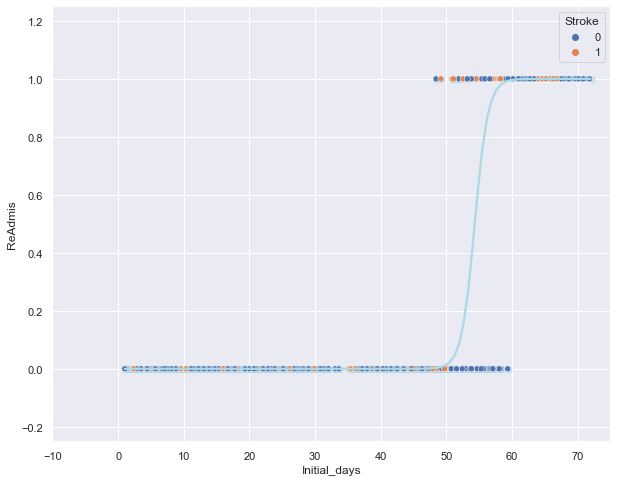

In [122]:
#Visualize logistic regression with stroke and initial days
sns.set(rc = {'figure.figsize':(10,8)})
plt.xlim(-10,75)
plt.ylim(-0.25,1.25)

sns.regplot(x='Initial_days', y="ReAdmis", data=med, color="lightblue", logistic=True)
sns.scatterplot(x='Initial_days', y="ReAdmis", hue="Stroke", color="black",  data=med, ci=None)

<AxesSubplot:xlabel='Initial_days', ylabel='ReAdmis'>

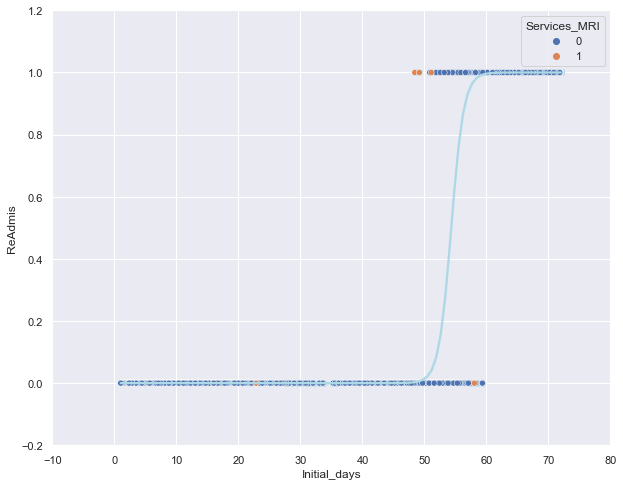

In [123]:
#Visualize logistic regression with MRI and initial days
sns.set(rc = {'figure.figsize':(10,8)})
plt.xlim(-10,80)
plt.ylim(-0.2,1.2)

sns.regplot(x='Initial_days', y="ReAdmis", data=med, color="lightblue", logistic=True)
sns.scatterplot(x='Initial_days', y="ReAdmis", hue="Services_MRI", color="black",  data=med, ci=None)

In [121]:
#Define Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

# Predicting the Test set results
y_pred = knn.predict(X_test)

# Making the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred) 
print(conf_matrix)

[[1892   46]
 [  36 1026]]


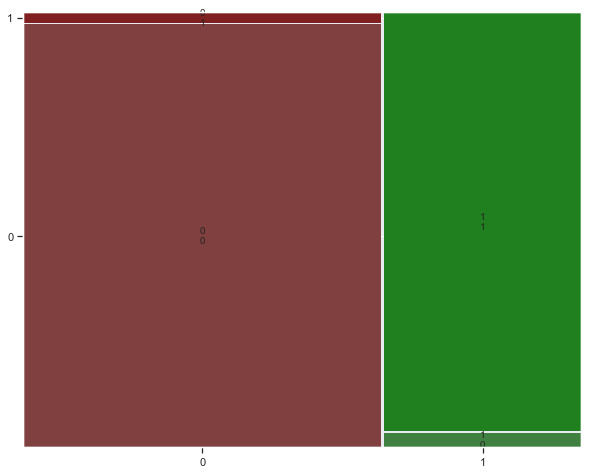

In [124]:
#Visualize the confusion matrix
from statsmodels.graphics.mosaicplot import mosaic
mosaic(conf_matrix)
plt.show()

In [125]:
#Export prepared data
med_df.to_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D208\medical_prepared_D208P_A2.csv")